In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

import seaborn as sns
%matplotlib inline

In [113]:
dataset = pd.read_csv('data/final_classification_dataset.csv')

In [114]:
# dataset = dataset.drop('category',axis=1)
dataset = dataset.drop('ASIN',axis=1)
dataset = dataset.drop('descriptionSentimentCom',axis=1)
dataset = dataset.drop('reviewSentimentCom',axis=1)
dataset = dataset.drop('salesRank',axis=1)

In [115]:
dataset = pd.get_dummies(dataset)

In [116]:
# import re
# dataset = dataset.select( lambda x : not re.search('empath_', x), axis = 1  )

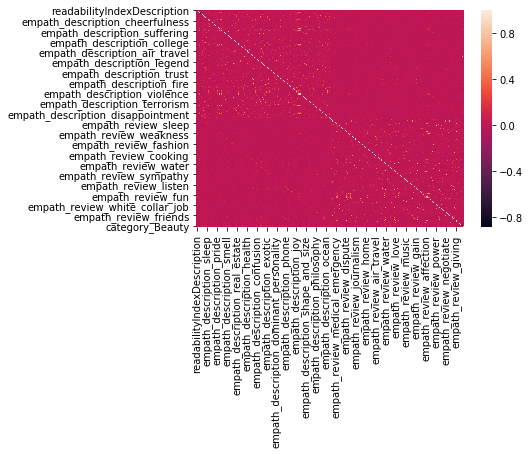

In [117]:
sns.heatmap(dataset.corr())

In [118]:
np.shape(dataset.values)

(12140, 403)

In [119]:
data_vars = dataset.columns.values.tolist()
# Target Variable
y = 'class'
# Independent Variables - Feature List
X = [i for i in data_vars if i not in y]

# Data transformation for Analysis
X = np.array(dataset[X])
y = np.array(dataset[y])
y = y.ravel()

print(X.shape)
print(y.shape)

(12140, 402)
(12140,)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [121]:
print( " Train : {} Test {} ".format( np.shape(X_train), np.shape(X_test) ))

 Train : (9105, 402) Test (3035, 402) 


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [123]:
clf = RandomForestClassifier(  )
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
# print ( cross_val_score(clf, X, y, cv = 3))

In [125]:
print(clf.feature_importances_)

[  1.52259351e-02   1.43352791e-02   1.10473335e-02   1.42325498e-02
   1.30792554e-02   9.85276748e-03   1.43241596e-02   1.22479142e-02
   4.90373257e-03   1.27790091e-03   8.12059019e-04   1.58843304e-03
   2.40903529e-03   4.86937081e-03   3.80631461e-03   2.51518604e-03
   2.56013163e-03   2.74547491e-03   4.56810427e-04   1.15808129e-03
   1.93610973e-03   2.16093329e-03   3.34670272e-04   5.67168268e-04
   2.19828215e-03   3.98395229e-04   6.44216489e-03   1.38944929e-03
   1.84176374e-03   3.74541767e-03   8.24040799e-04   3.28349176e-04
   2.31947342e-03   7.41074615e-04   2.59407324e-03   2.35548307e-04
   4.19588614e-04   2.24013418e-03   2.15697273e-03   8.95766030e-04
   1.93252284e-03   1.18595439e-03   1.36176787e-03   3.21211010e-03
   1.98883960e-03   3.98634409e-03   8.76095529e-04   1.94485222e-03
   2.37702018e-03   1.15881845e-03   1.82552913e-03   1.45556792e-03
   8.36582441e-04   4.49125919e-03   5.86941655e-03   5.47802097e-03
   1.86290056e-03   1.72772320e-03

In [126]:
clf.score(X_test, y_test)

0.5611202635914333

In [128]:
from sklearn.metrics import accuracy_score
ypred = clf.predict( X_test )
accuracy_score( y_test, ypred )

0.5611202635914333